# K-Means Analysis

## This script contains the following points:
### 1. Importing Libraries and Dataset
### 2. The Elbow Technique
### 3. K-Means Clustering
### 4. Conclusion

## 1. Importing Libraries and Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Graphs are displayed w/o calling
%matplotlib inline

In [3]:
# Import data
# Import data
path = r'C:\Users\nguye\OneDrive\05-2023 US Mass Shooting Data Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mass_Shootings_GA.csv'))

In [4]:
df.shape

(4232, 13)

In [5]:
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Suspect Category
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0,1,Single suspect
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0,0,No suspects
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0,0,No suspects
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0,0,No suspects
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0,0,No suspects


In [6]:
# Remove "Unnamed: 0" column
df = df.drop(columns = {'Unnamed: 0'})

In [7]:
df.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County',
       'Victims Injured', 'Victims Killed', 'Total Victims',
       'Suspects Injured', 'Suspects Killed', 'Suspects Arrested',
       'Total Suspects', 'Suspect Category'],
      dtype='object')

In [8]:
# Remove categorical columns and place in new dataframe
df_2 = df.drop(columns = {'Incident Date', 'State', 'City Or County', 'Suspect Category'})

## 2. The Elbow Technique

In [9]:
# Define the range and k-means cluster
num = range(1, 5)
kmeans = [KMeans(n_clusters = i) for i in num]

In [10]:
# Create the cluster score
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]
score

[-2334292186456853.0,
 -519426262120213.9,
 -235275109359485.8,
 -133258641470040.84]

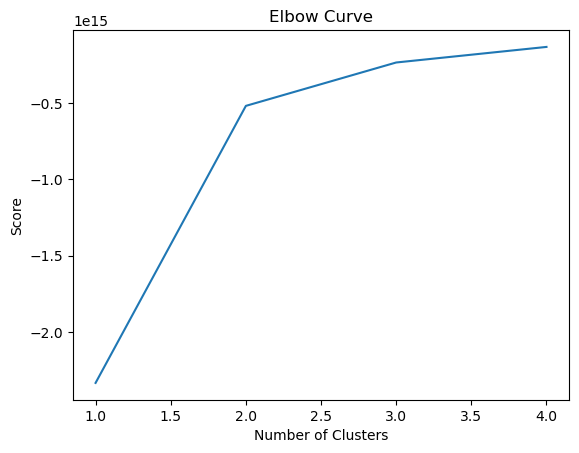

In [11]:
# Plot elbow curve
pl.plot(num, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow curve show a jump between 1 and 2 then the curve straightens out. Therefore, the optimal count for the clusters is two. 

## 3. K-Means Clustering

In [12]:
# Create k-means object
kmeans = KMeans(n_clusters = 2)

In [13]:
# Fit the k-means object to the data
kmeans.fit(df_2)

KMeans(n_clusters=2)

In [14]:
# Add the values of clusters to dataframe
df_2['Clusters'] = kmeans.fit_predict(df_2)

In [15]:
df_2.head()

,Incident ID,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Clusters
0,2589765,3,1,4,1,0,0,1,1
1,2589804,2,2,4,0,0,0,0,1
2,2589790,4,0,4,0,0,0,0,1
3,2589699,5,1,6,0,0,0,0,1
4,2587918,4,0,4,0,0,0,0,1


In [16]:
df_2['Clusters'].value_counts(dropna = False)

1    2510
0    1722
Name: Clusters, dtype: int64

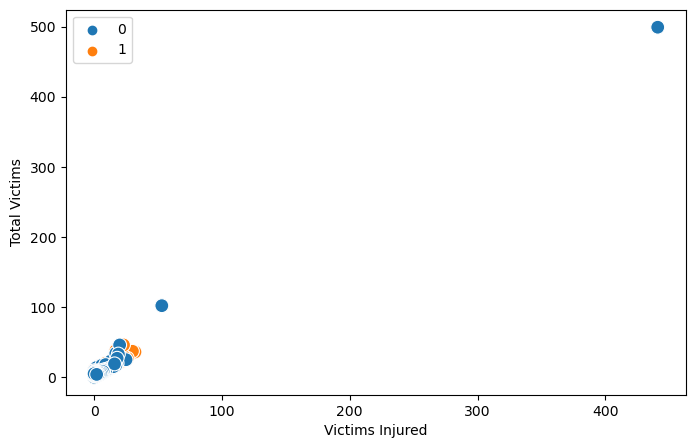

In [17]:
# Plot the clusters for 'Victims Injured' and 'Total Victims'
plt.figure(figsize = (8, 5))
ax = sns.scatterplot(x = df_2['Victims Injured'], y = df['Total Victims'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Victims Injured')
plt.ylabel('Total Victims')
plt.show()

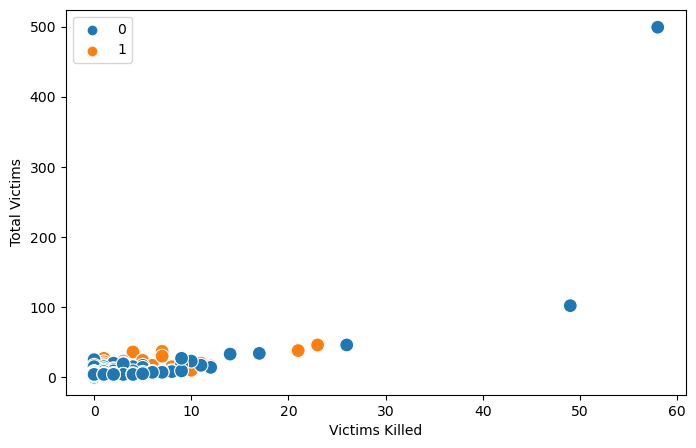

In [18]:
# Plot the clusters for 'Victims Killed' and 'Total Victims'
plt.figure(figsize = (8, 5))
ax = sns.scatterplot(x = df_2['Victims Killed'], y = df['Total Victims'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Victims Killed')
plt.ylabel('Total Victims')
plt.show()

### Cluster Interpretation

Here the clusters do not make sense, namely because there isn't a large variation between the numbers of victims. 

In [19]:
# Rename 'Clusters' columns by their respective colors
df_2.loc[df_2['Clusters'] == 0, 'Clusters'] = 'Blue'
df_2.loc[df_2['Clusters'] == 1, 'Clusters'] = 'Orange'

In [21]:
# Check descriptive statistics
df_2.groupby('Clusters').agg({'Victims Injured': ['mean', 'median'],
                            'Victims Killed': ['mean', 'median'],
                            'Total Victims': ['mean', 'median']})

Victims Injured        Victims Killed        Total Victims       
                    mean median           mean median          mean median
Clusters                                                                  
Blue            4.166086    4.0        1.08072    1.0      5.246806    4.0
Orange          4.094422    4.0        0.96494    1.0      5.059363    4.0

### Descriptive Statistics Interpretation
The descriptive statistics show that the values of the different clusters are similar to each other, therefore showing that there is not a high number of variations between the variables. 

## 4. Conclusion
Because of the limited number of columns in my dataset, this analysis does not provide any meaningful insights to the analysis. There is no pattern or insights to be gleaned from the dataset. I purposely left out the data for the suspects, as the amounts aren't varied enough for further analysis. 